# Streaming Application

## 1. Business Understanding

**About this Project**

Streaming app viewership data represents a collection of information related to how users interact with a streaming application. This data provides insights into user behavior, content consumption, and the overall performance of the streaming service.

[Streaming Application is a dataset from Kaggle](https://www.kaggle.com/datasets/rajatkumar30/streaming-application-viewership) 

### Context

In order to fully understand the topic, let's get some context with the survey results [*Behind the Stream*](https://www.adweek.com/resource-library/whats-shaping-todays-movie-and-tv-streaming-viewer-behavior/) from the Harris Poll on behalf of [Tubi](https://gdpr.tubi.tv/) (American platform and ad-supported streaming service owned by Fox Corp). This reports recovers data from 2,503 adults within the United States aged 18+ that stream video at least 1 hour a week. 

## 2. Data Mining

#### Libraries

In [1]:
import pandas as pd
import numpy as np

import time
import datetime
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#### Load the data

In [2]:
streaming = pd.read_csv('datasets\streaming_viewership_data.csv')
streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     6214 non-null   object 
 1   Session_ID                  6214 non-null   object 
 2   Device_ID                   6214 non-null   int64  
 3   Video_ID                    6214 non-null   int64  
 4   Duration_Watched (minutes)  6214 non-null   float64
 5   Genre                       6214 non-null   object 
 6   Country                     6214 non-null   object 
 7   Age                         6214 non-null   int64  
 8   Gender                      6214 non-null   object 
 9   Subscription_Status         6214 non-null   object 
 10  Ratings                     6214 non-null   int64  
 11  Languages                   6214 non-null   object 
 12  Device_Type                 6214 non-null   object 
 13  Location                    6214 

*Metadata:*

- **User_ID:** A unique identifier for the user.
- **Session_ID:** A unique identifier for the user's session.
- **Device_ID:** An identifier for the user's device.
- **Video_ID:** An identifier for the video content being viewed.
- **Duration_Watched (minutes):** The amount of time (in minutes) the user spent watching the video.
- **Genre:** The genre of the video content (e.g., Action, Comedy, Drama, etc.).
- **Country:** The country where the interaction event took place.
- **Age:** The age of the user.
- **Gender:** The gender of the user (e.g., Male, Female).
- **Subscription_Status:** The user's subscription status (e.g., Free, Premium).
- **Ratings:** The user's rating or feedback for the content (typically on a scale from 1 to 5).
- **Languages:** The language of the content being viewed.
- **Device_Type:** The type of device used by the user (e.g., Smartphone, Tablet, etc.).
- **Location:** The location or city where the interaction event occurred.
- **Playback_Quality:** The quality of video playback (e.g., HD, SD, 4K).
- **Interaction_Events:** The count of interaction events that occurred during the user's session (e.g., clicks, likes, shares, etc.).

## 3. Data Profiling

### Initial Explorations

#### Generals

In [4]:
streaming.head() 

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


In [5]:
streaming.shape

(6214, 16)

In [6]:
streaming.dtypes

User_ID                        object
Session_ID                     object
Device_ID                       int64
Video_ID                        int64
Duration_Watched (minutes)    float64
Genre                          object
Country                        object
Age                             int64
Gender                         object
Subscription_Status            object
Ratings                         int64
Languages                      object
Device_Type                    object
Location                       object
Playback_Quality               object
Interaction_Events              int64
dtype: object

In [7]:
streaming.columns

Index(['User_ID', 'Session_ID', 'Device_ID', 'Video_ID',
       'Duration_Watched (minutes)', 'Genre', 'Country', 'Age', 'Gender',
       'Subscription_Status', 'Ratings', 'Languages', 'Device_Type',
       'Location', 'Playback_Quality', 'Interaction_Events'],
      dtype='object')

#### Variable Specifics

##### User_ID and Session_ID

In [8]:
streaming['User_ID'].nunique()

6214

In [9]:
streaming['Session_ID'].nunique()

6214

To confirm if each User_ID is associated with only one unique Session_ID, we can group the data by User_ID and count the distinct Session_ID values for each user. If any user has a count greater than 1, it means that a User_ID is associated with more than one Session_ID.

In [10]:
# Group by User_ID and count distinct Session_IDs
distinct_session_counts = streaming.groupby('User_ID')['Session_ID'].nunique().reset_index()

# Check for any User_ID with more than one distinct Session_ID
multiple_sessions = distinct_session_counts[distinct_session_counts['Session_ID'] > 1]

# Display the result
print(multiple_sessions)

Empty DataFrame
Columns: [User_ID, Session_ID]
Index: []


The dataset found no users with multiple session IDs, confirming that the User_ID and Session_ID are in a one-to-one relationship.

##### Device_ID

In [11]:
streaming['Device_ID'].nunique()

1000

In [19]:
# Extract unique Device_ID values and sort them in ascending order
np.sort(streaming['Device_ID'].unique())

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

It seems there is possible sequential assignment for the Device_ID values as these are assigned sequentially, perhaps there is an ID generation mechanism where new devices are incrementally assigned the next available integer ID as they are added to the system.

To analyze whether a device can have more than one user connected, let's group the data by Device_ID and check how many distinct User_ID values are associated with each device. 

In [43]:
# Group by Device_ID and count distinct User_IDs
device_user_counts = streaming.groupby('Device_ID')['User_ID'].nunique().reset_index()

# Rename the column for clarity
device_user_counts.rename(columns={'User_ID': 'Distinct_User_Count'}, inplace=True)

# Group by Distinct_User_Count and count the number of devices for each distinct user count
distinct_user_count_summary = device_user_counts.groupby('Distinct_User_Count')['Device_ID'].count().reset_index()

# Rename columns for clarity
distinct_user_count_summary.rename(columns={'Device_ID': 'Device_Count'}, inplace=True)

# Sort the results by Distinct_User_Count in descending order
distinct_user_count_summary.sort_values(by='Distinct_User_Count', ascending=False)

,Distinct_User_Count,Device_Count
14,16,1
13,14,1
12,13,9
11,12,20
10,11,22
9,10,46
8,9,85
7,8,103
6,7,138
5,6,161


- While some devices are highly shared, a large proportion is shared among small groups, particularly with 6 users.

- Devices shared by many users (16 and 14 users) might be found in communal settings, while those with 6 users could represent family or small office environments.

- The 15 devices used by only one user suggest either dedicated personal usage or lack of accessibility for sharing.

##### Video_ID

In [24]:
streaming['Video_ID'].nunique()

100

In [28]:
# Extract unique Video_ID values and sort them in ascending order using numpy
np.sort(streaming['Video_ID'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

The Video_ID range from 1 to 100 indicates that the dataset includes exactly 100 distinct videos (movies, series, etc.). This suggests that the dataset is fixed to include only 100 available videos on the platform, potentially the most-watched content.

To find out how many users have watched each Video_ID, let's group the data by Video_ID and count the number of distinct User_ID values associated with each video. 

In [52]:
# Group by Video_ID and count distinct User_IDs
video_user_counts = streaming.groupby('Video_ID')['User_ID'].nunique().reset_index()

# Rename the column for clarity
video_user_counts.rename(columns={'User_ID': 'Distinct_User_Count'}, inplace=True)

# Sort the data by Distinct_User_Count in descending order (optional)
video_user_counts_sorted = video_user_counts.sort_values(by='Distinct_User_Count', ascending=False)

In [51]:
video_user_counts_sorted.head(n=10)

,Video_ID,Distinct_User_Count
39,40,79
28,29,78
10,11,77
89,90,76
82,83,76
58,59,76
53,54,75
43,44,74
23,24,73
77,78,71


In [53]:
video_user_counts_sorted.tail(n=10)

,Video_ID,Distinct_User_Count
47,48,52
49,50,52
0,1,52
9,10,51
7,8,51
90,91,50
61,62,50
52,53,49
98,99,47
38,39,46


- The top 10 most-watched videos each have more than 70 distinct users. Video_ID 40 is the most watched, with 79 distinct users.

- The bottom 10 least-watched videos have around 50 distinct users each. Video_ID 39 is the least watched, with only 46 distinct users.

##### Duration_Watched (minutes)

In [54]:
streaming['Duration_Watched (minutes)'].nunique()

6214

To analyze the distribution of the Duration_Watched (minutes) column from the most engaging (longest watched) to the least engaging (shortest watched), let's sort the data (in descending order).

In [62]:
# Sort the Duration_Watched (minutes) column
sorted_durations = streaming['Duration_Watched (minutes)'].sort_values()

# Display the sorted durations
print(sorted_durations.head(10))  # Show the first 10 sorted durations
print(sorted_durations.tail(10))  # Show the last 10 sorted durations

2526    0.055809
5222    0.061911
3915    0.072536
1335    0.080602
4755    0.092152
3709    0.096735
5872    0.110173
5622    0.130475
2549    0.135560
3814    0.139156
Name: Duration_Watched (minutes), dtype: float64
5552    119.900747
2280    119.916255
5224    119.920952
3837    119.925319
6189    119.926372
2175    119.945439
2071    119.958384
955     119.974953
6079    119.990886
1587    119.999972
Name: Duration_Watched (minutes), dtype: float64


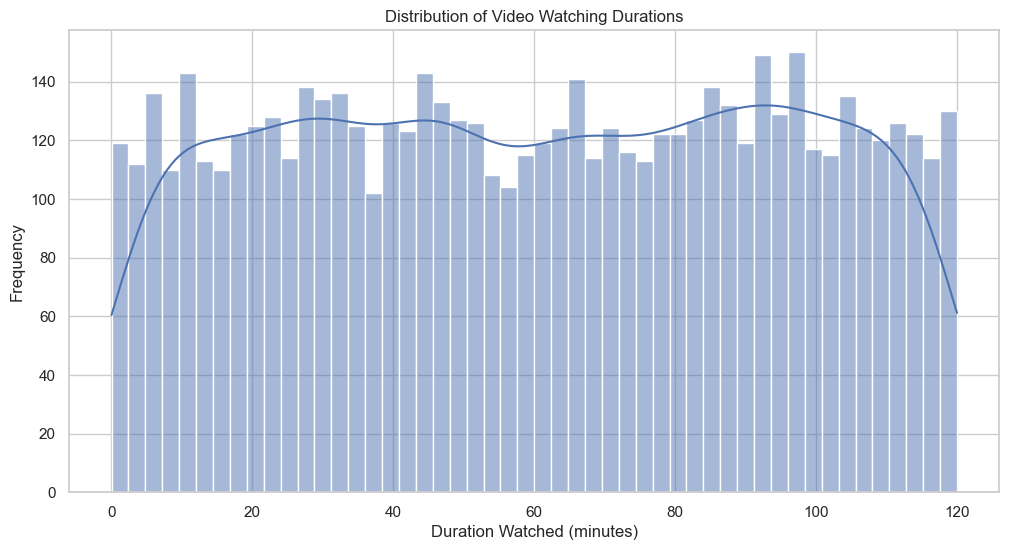

In [65]:
# Set up the figure size and style
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Plot the histogram
sns.histplot(streaming['Duration_Watched (minutes)'], bins=50, kde=True)

# Add labels and title
plt.xlabel('Duration Watched (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Video Watching Durations')
plt.show()

- Short Durations: The shortest durations are just a few seconds, indicating some users barely engage with certain videos.

- Long Durations: The longest durations are close to 120 minutes, suggesting that some users watch videos for extended periods, likely indicating full-length content consumption (movies or documentals).

- Distribution Pattern: The histogram shows a skew towards shorter durations, with a peak at shorter viewing times and a gradual decline towards longer durations. This pattern is typical, as users often watch shorter videos or only a portion of longer content.

##### Country

In [66]:
streaming['Country'].nunique()

243

In [86]:
streaming['Country'].unique()

array(['Sudan', 'Cuba', 'Japan', "Lao People's Democratic Republic",
       'Bangladesh', 'Tokelau', 'Guyana', 'Guinea', 'Palau', 'Ecuador',
       'Iceland', 'Colombia', 'Dominican Republic', 'Georgia', 'Malaysia',
       'Togo', 'Iran', 'Estonia', 'Korea', 'Lebanon',
       'Trinidad and Tobago', 'Saint Vincent and the Grenadines',
       'Belarus', 'Northern Mariana Islands', 'Jersey', 'Niue', 'Lesotho',
       'Anguilla', 'Romania', 'Uganda', 'Comoros', 'Austria', 'Paraguay',
       'Angola', 'Philippines', 'Cambodia', 'Benin', 'Yemen',
       'Luxembourg', 'Malawi', 'Heard Island and McDonald Islands',
       'Wallis and Futuna', 'Macao', 'Honduras', 'Liechtenstein',
       'Uruguay', 'Cameroon', 'Cape Verde', 'San Marino', 'Guadeloupe',
       'Dominica', 'Egypt', 'Jamaica', 'Portugal', 'French Polynesia',
       'Gambia', 'Niger', 'Fiji', 'United States Virgin Islands', 'Aruba',
       'French Southern Territories', 'China', 'Sweden', "Cote d'Ivoire",
       'Saudi Arabia', 'Cro

Global Reach: The data suggests a wide geographical reach, covering most countries worldwide. This diversity could indicate that the platform is globally accessible or popular across many regions.

In [87]:
# Group by Country and count unique User_IDs
users_per_country = streaming.groupby('Country')['User_ID'].nunique().reset_index()

# Rename columns for clarity
users_per_country.columns = ['Country', 'User_Count']

# Sort the data by User_Count in descending order
sorted_users_per_country = users_per_country.sort_values(by='User_Count', ascending=False)

# Display the top countries by user count
print("Countries sorted by number of users:")
print(sorted_users_per_country.head(10))  # Display the top 10 countries

Countries sorted by number of users:
                          Country  User_Count
49                          Congo          49
238             Wallis and Futuna          42
114                         Korea          42
199               Solomon Islands          41
226                        Uganda          39
153                 New Caledonia          38
218                       Tokelau          36
142                      Mongolia          36
207  Svalbard & Jan Mayen Islands          35
42                           Chad          35


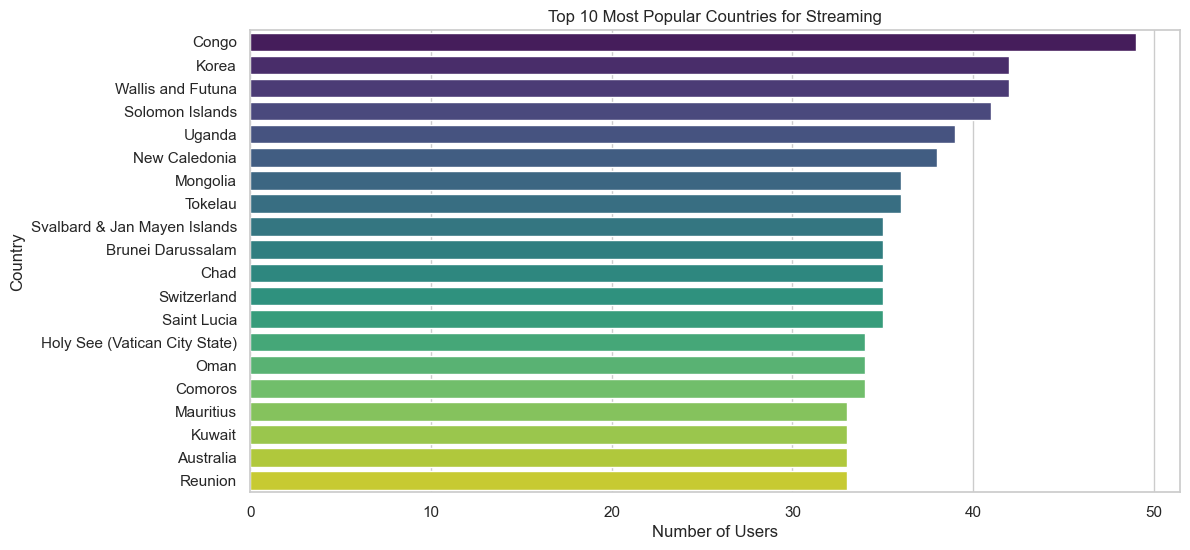

In [71]:
# Visualize the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='User_Count', y='Country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Most Popular Countries for Streaming')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.show()

In [ ]:
streaming['Genre'].unique()

In [ ]:
streaming['Age'].nunique()

In [ ]:
streaming['Gender'].nunique()

In [ ]:
streaming['Gender'].unique()

In [ ]:
streaming['Subscription_Status'].nunique()

In [ ]:
streaming['Subscription_Status'].unique()

In [ ]:
streaming['Ratings'].nunique()

In [ ]:
streaming['Ratings'].unique()

In [ ]:
streaming['Languages'].nunique()

In [ ]:
streaming['Languages'].unique()

In [ ]:
streaming['Device_Type'].nunique()

In [ ]:
streaming['Device_Type'].unique()

In [ ]:
streaming['Location'].nunique()

In [ ]:
streaming['Playback_Quality'].nunique()

In [ ]:
streaming['Playback_Quality'].unique()

In [ ]:
streaming['Interaction_Events'].nunique()

#### Insights from Initial Explorations

- Nonexistent multiple session IDs: There are no users with multiple sessions, as the User_ID and Session_ID are in a one-to-one relationship.

- Device sharing patterns by mainly small groups: While some devices are highly shared (up to 16 users), the most common pattern is small group sharing, with most devices being shared by 6 users. Additionally, a minority of devices are used exclusively by a single user, highlighting a mix of communal and personal usage.

- There are exactly 100 distinct videos available in the streaming app, possibly representing the most-watched content on the platform.

- The top 10 most-watched videos each have more than 70 distinct users, with Video_ID 40 being the most popular at 79 users. In contrast, the bottom 10 least-watched videos have around 50 distinct users each, with Video_ID 39 being the least popular at 46 users.

- The data reveals a wide range of video-watching durations, from just a few seconds to nearly two hours. The distribution is skewed towards shorter viewing times, indicating that most users engage with shorter videos or only part of longer content. However, some users still watch videos for extended periods, likely consuming full-length content such as movies or documentaries.

### Exploring numerical and categorical variables

In [ ]:
# Extracting column names with numerical data types from the dataframe
streaming.select_dtypes("number").columns

In [ ]:
# Counting and sorting the unique values for each numerical column in descending order
streaming.select_dtypes("number").nunique().sort_values(ascending=False)

In [ ]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = streaming.select_dtypes("number").loc[:, streaming.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical.value_counts()

In [ ]:
# Retrieving column names with object (typically string) data types from the dataframe
streaming.select_dtypes("object").columns

In [ ]:
# Counting and sorting the unique values for each object (string) column in descending order
streaming.select_dtypes("object").nunique().sort_values(ascending=False)

#### Defining Numerical and Categorical Variables

In [ ]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# Also, I'm including the columns in potential_categorical_from_numerical as categorical variables.
streaming_categorical = pd.concat([streaming.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
streaming_numerical = streaming.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [ ]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(streaming.columns) == len(streaming.select_dtypes("object").columns) + len(streaming.select_dtypes("number").columns)

#### Numerical Summary

### To explore

- Video_ID:
    - Analyze Viewing Patterns: Investigate the distribution of viewing durations to identify common viewing patterns and understand typical user engagement.
    - Identify High Engagement Content: Look into the videos associated with the maximum durations to learn what makes them engaging.
    - Consider Short Engagement: Understand why some users have very short engagement to improve content or user experience.

- Duration_Watched (minutes):
    - Explore specific videos with the shortest and longest durations to understand user behavior. (genre)
    - Optimization Opportunities: Analyzing why users disengage quickly could lead to improvements in content delivery, recommendations, or user interface design to increase watch time.

- Country:
    - Localization Opportunities: Consider language support, cultural preferences, and region-specific content to enhance user experiences in diverse locations.

## 4. Data Refinement

### Data Cleansing

Identifing and removing null values, errors, inaccuracies or redundance from the data.

In [ ]:
# Checking for missing data
streaming.isnull().sum().sort_values(ascending=False)

In [ ]:
# Identifying columns in the dataframe where over 70% of the values are missing
streaming.columns[streaming.isnull().mean() > 0.7]

In [ ]:
# Filtering out columns in the dataframe where more than 70% of the values are missing
streaming = streaming[streaming.columns[streaming.isnull().mean() < 0.7]]

In [ ]:
streaming_categorical.head()

In [ ]:
streaming['ID'] = streaming.index
streaming.head()

In [ ]:
# Removing the "Id" column from the dataframe
df.drop("Id", inplace=True, axis=1)

### Data Transformation

Let's adapt data into a format suitable for further analysis.

### Data Normalization

Adjusting values to a common scale for comparison and analysis.

### Hypotesis Definition

1. The most common recommenders are user of streaming are viewers from Gen Z and Millennials.
--
2. The duration spent in the action genre by Males is higher than in Females
3. The duration spent in the Drama genre by Females is higher than in Males
4. Premium users tend to rate content lower than Free users
5. Premium users spend more time watching content than Free users
6. Content streamed in Smartphones and Tables are of lower quality than other devices
7. Playback quality of 4k is mostly watched on Smart TVs
8. Users below 35 tend to have in average more interaction events than older users
9. The quantity of premium users grows as users are older (there are more premium users at 40 years old, than those at 20s)
10. Barcelona stream more content in english than Madrid
11. Comedy content is usually more streamed over mobile devices (Smartphones and Tablets) without a strong preference on video playback quality and having premium users rating it higher than free users

## 5. Feature Engineering

### Feature selection

Cutting down the features that add more noise than information. 

- Use filter methods (apply statistical measure to assign scoring to each feature)
- Wrapper methods (frame the selection of features as a search problem and use a heuristic to perform the search)
- Embedded methods (use machine learning to figure out which features contribute best to the accuracy)

### Feature construction

Creating new features from the current one to enhance the analysis.

## 6. Predictive Modeling

### Model Development

#### Initial Tuning

**Grid Search**

**Cross-Validation**

### Advanced Modeling

#### Ensemble Models

### Evaluation for Best Model

## 7. Data Visualization

## Conclusions

This data provides insights into user behavior, content consumption, and the overall performance of the streaming service.

### Key Insights

### Final Thoughts